# Script Description

This script is designed for analyzing the result data of internet speed tests and experiments with Azure Cosmos DB and Azure SQL Database. It reads data from respective CSV result files and imports them into a DataFrame. It should be noted that no data cleaning is performed, allowing outliers to be considered, thus providing a realistic outcome.

The CSV result files from Azure Cosmos DB and Azure SQL Database always contain 10 records with columns "DurationTime," which describes the duration of the query, "NumberOfProcessedDatasets," indicating the number of datasets processed by the query, and "NumberOfDatasetsInDatabase," showing the number of datasets already present in the database.

**Example Dataset (Azure Cosmos DB and Azure SQL Database):**
| DurationTime       | NumberOfProcessedDatasets | NumberOfDatasetsInDatabase |
|--------------------|---------------------------|----------------------------|
| 4.272798935572307  | 1125                      | 10000                      |
| 9.611681381861368  | 2255                      | 20000                      |
| 14.166181087493896 | 3370                      | 30000                      |
| 18.571211258570354 | 4430                      | 40000                      |
| 22.76758114496867  | 5570                      | 50000                      |
| 27.740037361780804 | 6670                      | 60000                      |
| 33.20400412877401  | 7730                      | 70000                      |
| 37.8562703927358   | 8865                      | 80000                      |
| 43.600467681884766 | 10020                     | 90000                      |
| 47.71582281589508  | 11130                     | 100000                     |

The internet speed test CSV file includes columns "Timestamp," "Download Speed (Mbps)" representing the download speed at the measured time, and "Upload Speed (Mbps)" representing the upload speed at the measured time.

**Example Dataset (Internet Speed Test):**
| Timestamp          | Download Speed (Mbps) | Upload Speed (Mbps) |
|--------------------|-----------------------|---------------------|
| 2024-06-13 06:00:18| 146.4420368716387     | 8.774729806445906   |
| 2024-06-13 06:06:10| 129.76485968585195    | 35.35951825933835   |
| 2024-06-13 06:07:02| 108.28767454844575    | 35.14249891907259   |


## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

## Defining Functions

In [2]:
def read_csv_data_and_store_in_dataframe(folder, filename):
    """
    This function can be used to read out the CSV files with the result data and save them in a dataframe.
    
    Args:
        folder (str): Folder where the result csv files are stored.
        filename (str): Filename where the desired results are stored.
        
    Return:
        df_result_data (dataframe): The data read from the CSV file. 
    
    """
    
    filepath = folder + '/' + filename
    df_result_data = pd.read_csv(filepath)
    
    return df_result_data

In [3]:
def plot_database_result_data(df_result_data, plot_title, plot_subtitle, y_axis_range_1=None, y_axis_range_2=None):
    """
    Plots database result data with query duration times and optionally the number of processed datasets.

    Args:
        df_result_data (DataFrame): The dataframe containing the result data to plot.
        plot_title (str): The title of the plot.
        plot_subtitle (str): The subtitle of plot.
        y_axis_range_1 (tuple, optional): The range for the Y-axis of the duration time plot.
        y_axis_range_2 (tuple, optional): The range for the Y-axis of the number of processed datasets plot (bar).

    """
    
    fig, axis_1 = plt.subplots(figsize=(14, 7))
    
    # Prepare first axis
    axis_1.set_xlabel('Number of data records in database', fontsize=12)
    axis_1.set_ylabel('Average query duration in [s]', fontsize=12)
    axis_1.grid(True, linewidth=0.5)
    axis_1.set_zorder(1)  # Results of DuerationTime should be in front, default zorder is 0 for axis_1 and axis_2
    axis_1.patch.set_visible(False)  # Prevents axis_1 from being hiding by axis_2
    
    axis_1.tick_params(axis='both', which='major', labelsize=12)  # Schriftgröße der Tick Labels anpassen

    # Customize Y-Axis for first axis
    if y_axis_range_1:
        axis_1.set_ylim(y_axis_range_1)
        
    axis_2 = axis_1.twinx()
    axis_2.set_ylabel('Number of affected data records', fontsize=12)

    axis_2.tick_params(axis='both', which='major', labelsize=12)

    if y_axis_range_2:
        axis_2.set_ylim(y_axis_range_2)

    # Plot the second axis    
    axis_1.plot(
        df_result_data['NumberOfDatasetsInDatabase'], 
        df_result_data['DurationTime'], 
        marker='o', 
        linestyle='-', 
        color='red', 
        label='Query Duration Time'
    )

    # Plot the first axis
    axis_2.bar(
        df_result_data['NumberOfDatasetsInDatabase'], 
        df_result_data['NumberOfProcessedDatasets'], 
        width=(df_result_data['NumberOfDatasetsInDatabase'].max())//30, 
        alpha=1, 
        color='skyblue', 
        label='Number of data records affected by the query'
    )        
        
    # Set main title
    fig.suptitle(plot_title, fontsize=18, y=1.02)
    
    # Add subtitle
    fig.text(0.5, 0.95, plot_subtitle, ha='center', fontsize=12)

    lines, labels = axis_1.get_legend_handles_labels()
    lines2, labels2 = axis_2.get_legend_handles_labels()
    axis_1.legend(lines + lines2, labels + labels2, loc='upper left')

    plt.xticks(df_result_data['NumberOfDatasetsInDatabase'])
    plt.tight_layout()
    plt.show()

In [4]:
def plot_internet_speed_results(df_result_data):
    """
    Plots internet speedtest results.

    Args:
        df_result_data (DataFrame): The dataframe containing the result data to plot.
    """
    
    plt.figure(figsize=(14, 7))
    plt.grid(True, linewidth=0.5)

    df_result_data['Timestamp'] = pd.to_datetime(df_result_data['Timestamp'])
    
    plt.plot(
        df_result_data['Timestamp'], 
        df_result_data['Download Speed (Mbps)'], 
        label='Download Speed (Mbps)', 
        color='b',
        linewidth=0.8,
        linestyle='--'
    )
    
    plt.plot(
        df_result_data['Timestamp'], 
        df_result_data['Upload Speed (Mbps)'], 
        label='Upload Speed (Mbps)', 
        color='r',
        linewidth=0.8,
        linestyle='--'
    )
    
    # Calculate overall average from the start of plotted data
    start_timestamp = df_result_data['Timestamp'].iloc[0]
    overall_avg_download = df_result_data.loc[df_result_data['Timestamp'] >= start_timestamp, 'Download Speed (Mbps)'].mean()
    overall_avg_upload = df_result_data.loc[df_result_data['Timestamp'] >= start_timestamp, 'Upload Speed (Mbps)'].mean()

    # Plot overall average
    plt.axhline(y=overall_avg_download, color='b', linestyle='-', label=f'Download Speed (Mbps) - Overall Average: {overall_avg_download:.2f}')
    plt.axhline(y=overall_avg_upload, color='r', linestyle='-', label=f'Upload Speed (Mbps) - Overall Average: {overall_avg_upload:.2f}')

    # Label diagram
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Internet-Speed [Mbps]', fontsize=12)
    plt.legend()

    # Format axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Add vertical lines with labels for start and end-experiment times
    vertical_lines = [
        {'time': '2024-06-13 06:10:00', 'label': 'Start both Experiment\nat 06:10 o´clock'},
        {'time': '2024-06-13 11:16:00', 'label': 'End Experiment\nAzure Cosmos DB at 11:16 o´clock'},
        {'time': '2024-06-13 13:23:00', 'label': 'End Experiment\nAzure SQL Database at 13:23 o´clock'}
    ]
    
    for line in vertical_lines:
        line_time = pd.to_datetime(line['time'])
        plt.axvline(x=line_time, color='gray', linestyle='--', linewidth=1, label=f'X={line_time}')
        plt.text(line_time, plt.ylim()[1]*1.02, line['label'], rotation=0, verticalalignment='bottom', horizontalalignment='center', color='gray')

    # Set main title
    plt.suptitle("Internet speed during the experiment", fontsize=18)
    
    plt.tight_layout()
    plt.show()

# Use-Cases

## Internet Speed During Experiments

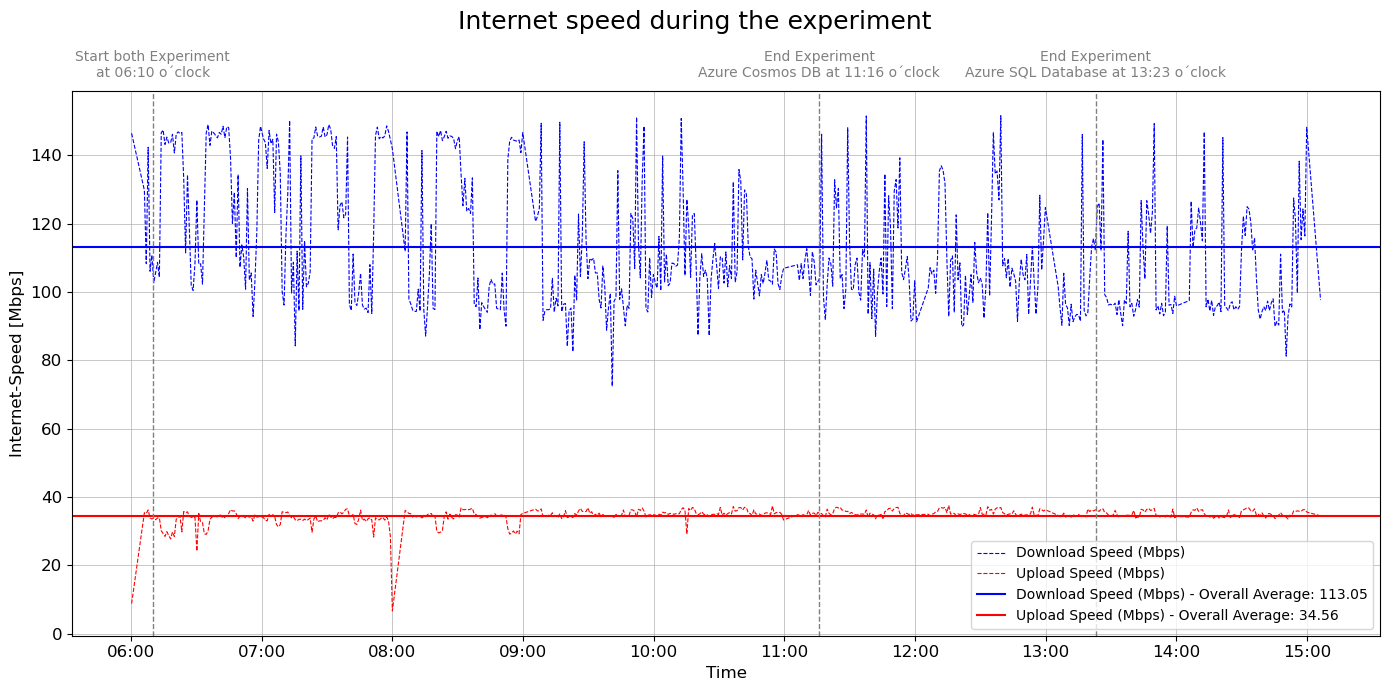

In [5]:
# Azure SQL Database
df_result_data = read_csv_data_and_store_in_dataframe("Experiment_Results_Internet_Speedtest", "internet_speedtest_results.csv")

plot_internet_speed_results(df_result_data)

## INSERT Data

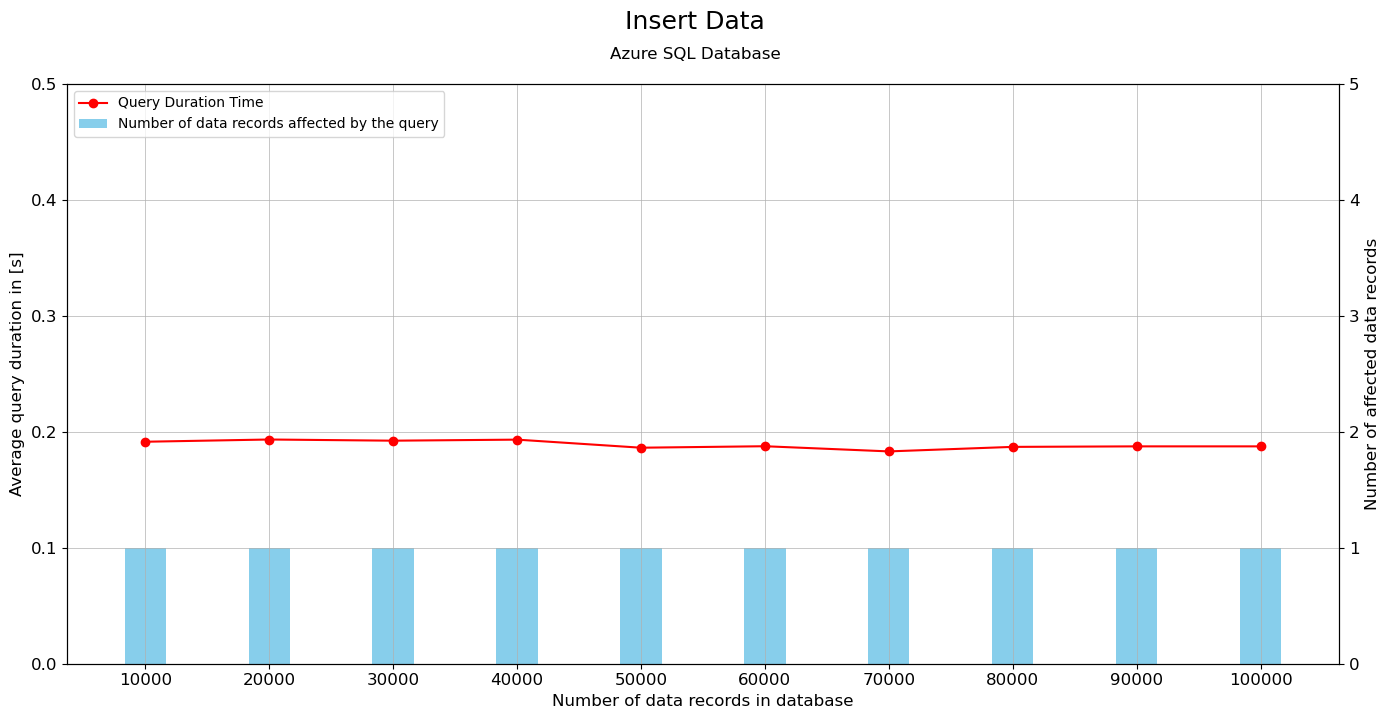

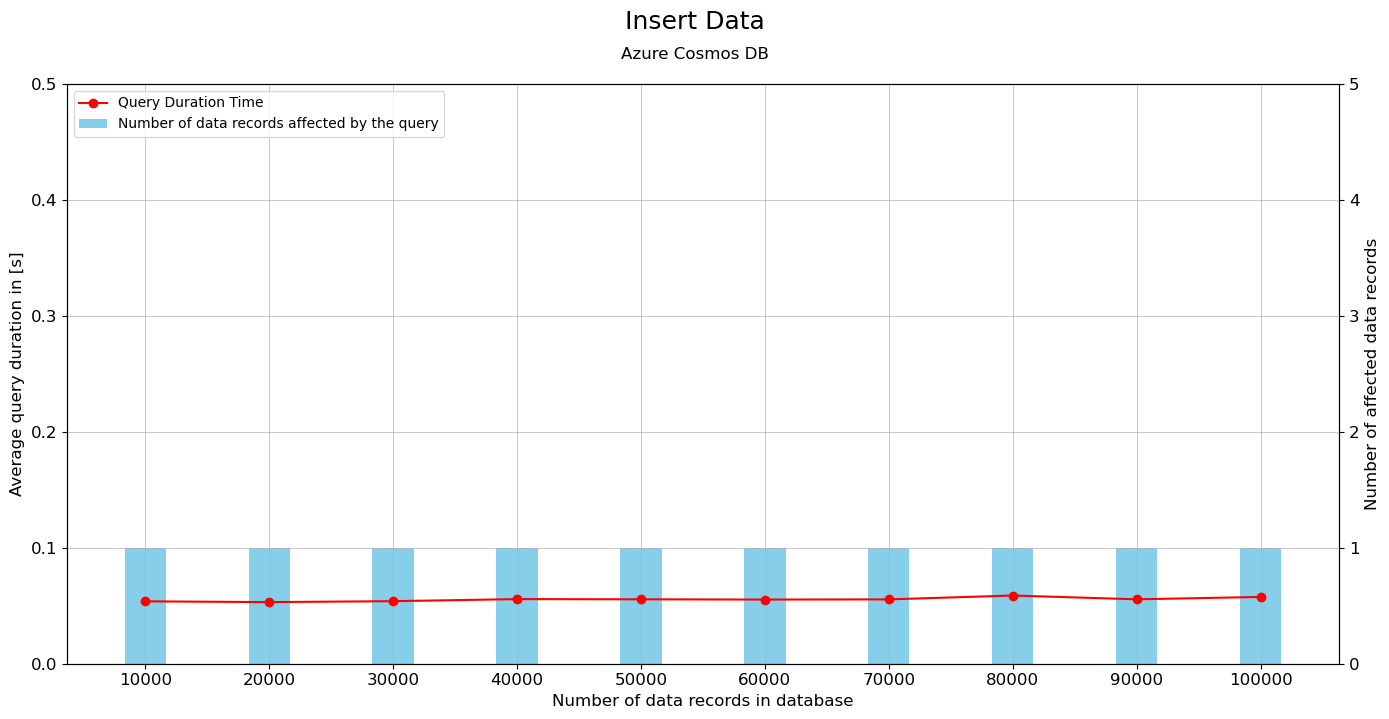

In [6]:
# Azure SQL Database
df_result_data = read_csv_data_and_store_in_dataframe("Experiment_Results_Azure_SQL_Database", "insert_data.csv")

plot_database_result_data(
    df_result_data, 
    plot_title = "Insert Data",
    plot_subtitle = "Azure SQL Database",
    y_axis_range_1 = (0 , 0.5),
    y_axis_range_2 = (0 , 5),
)


# Azure Cosmos DB
df_result_data = read_csv_data_and_store_in_dataframe("Experiment_Results_Azure_Cosmos_DB", "insert_data.csv")

plot_database_result_data(
    df_result_data, 
    plot_title = "Insert Data",
    plot_subtitle = "Azure Cosmos DB",
    y_axis_range_1 = (0 , 0.5),
    y_axis_range_2 = (0 , 5)
)

## SELECT Data

### Select one Dataset via indexed attribute

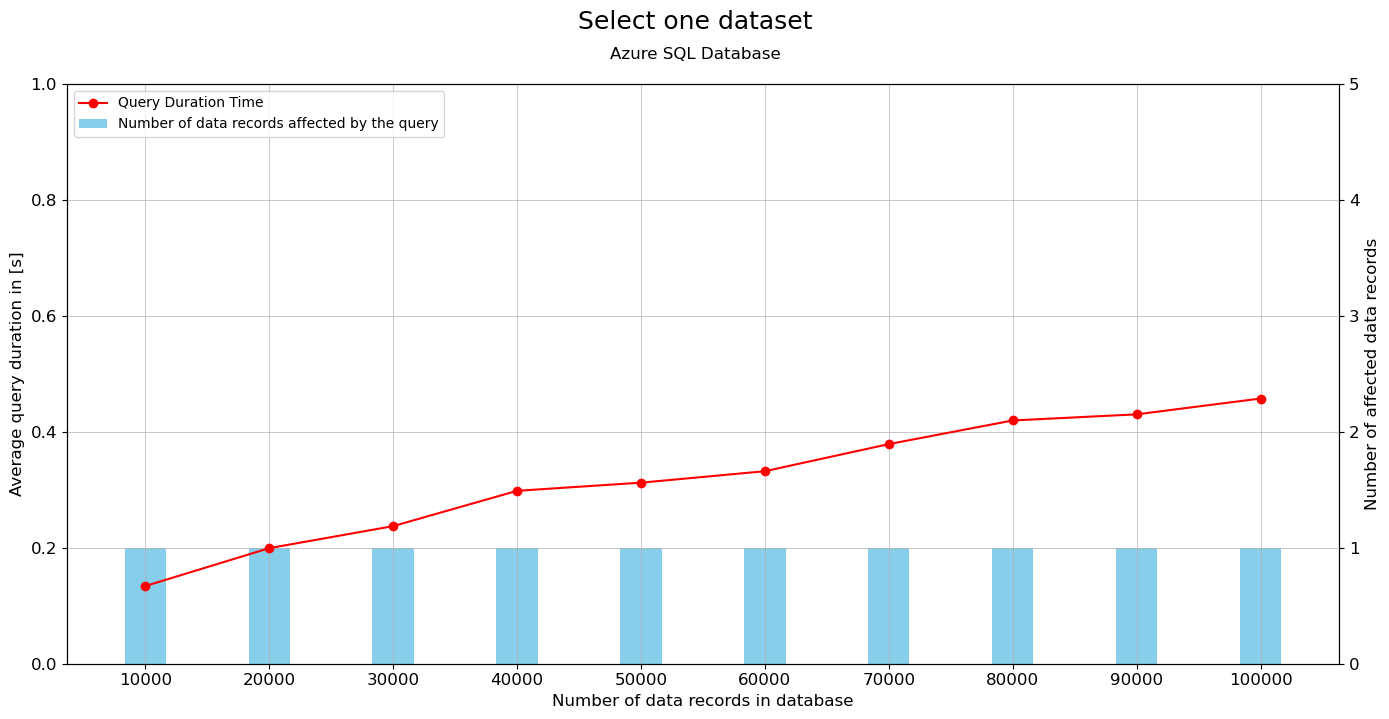

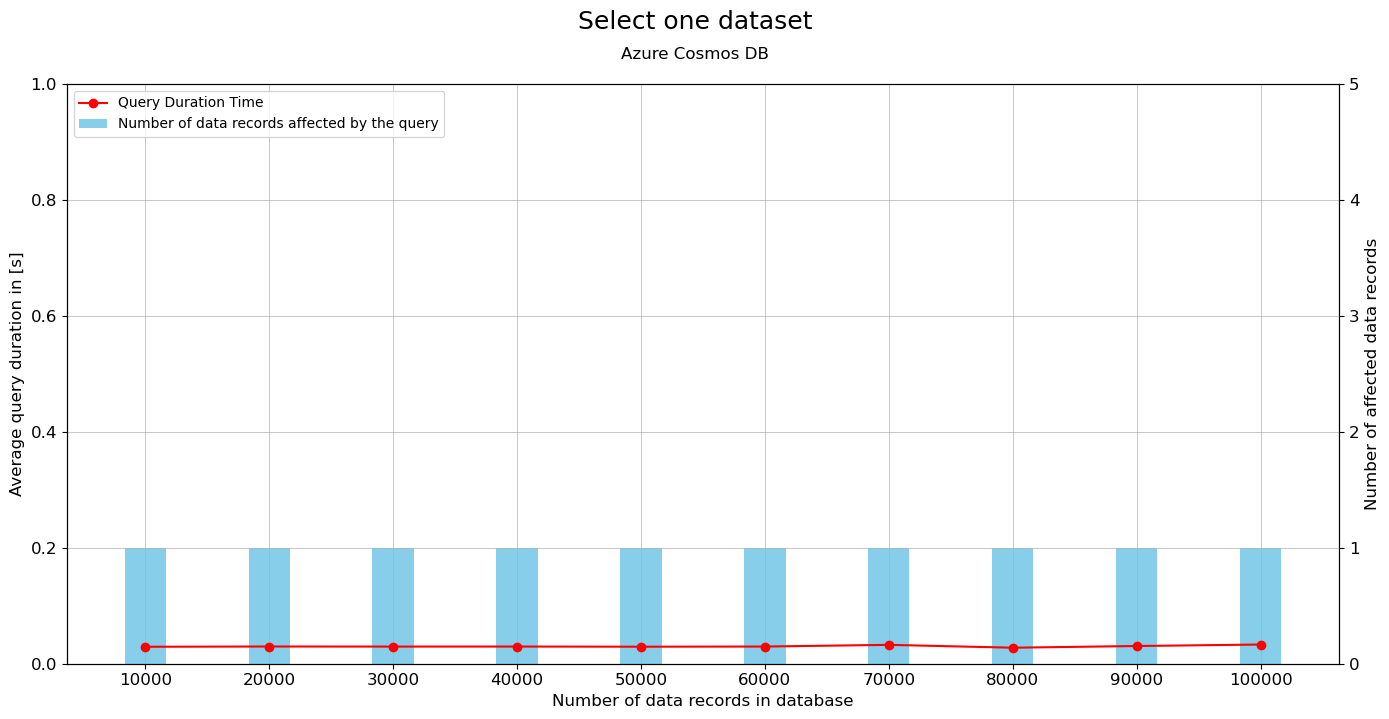

In [7]:
# Azure SQL Database
df_result_data = read_csv_data_and_store_in_dataframe("Experiment_Results_Azure_SQL_Database", "select_to_serialnumber.csv")

plot_database_result_data(
    df_result_data, 
    plot_title = "Select one dataset",
    plot_subtitle = "Azure SQL Database",
    y_axis_range_1 = (0 , 1),
    y_axis_range_2 = (0 , 5),
)


# Azure Cosmos DB
df_result_data = read_csv_data_and_store_in_dataframe("Experiment_Results_Azure_Cosmos_DB", "select_to_serialnumber.csv")

plot_database_result_data(
    df_result_data, 
    plot_title = "Select one dataset",
    plot_subtitle = "Azure Cosmos DB",
    y_axis_range_1 = (0 , 1),
    y_axis_range_2 = (0 , 5)
)

### Select n datasets to articlename and machinename (Select via Index)

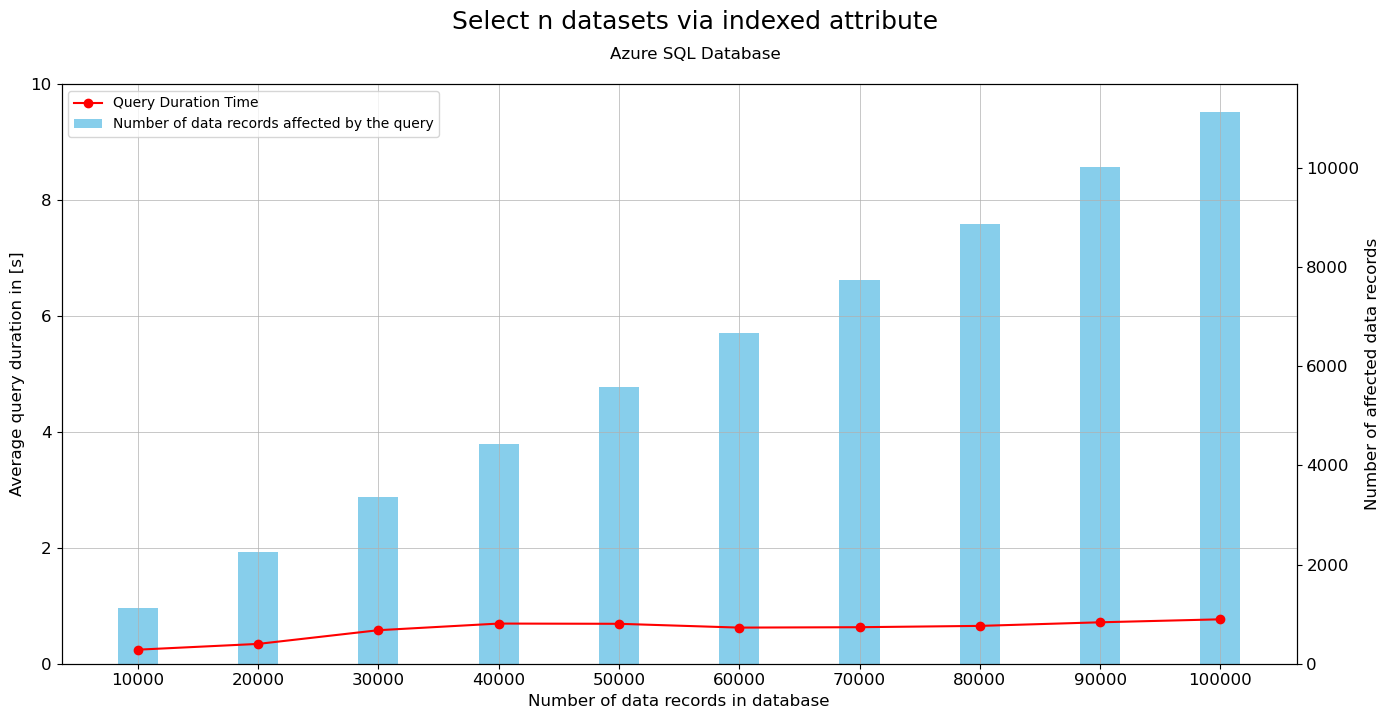

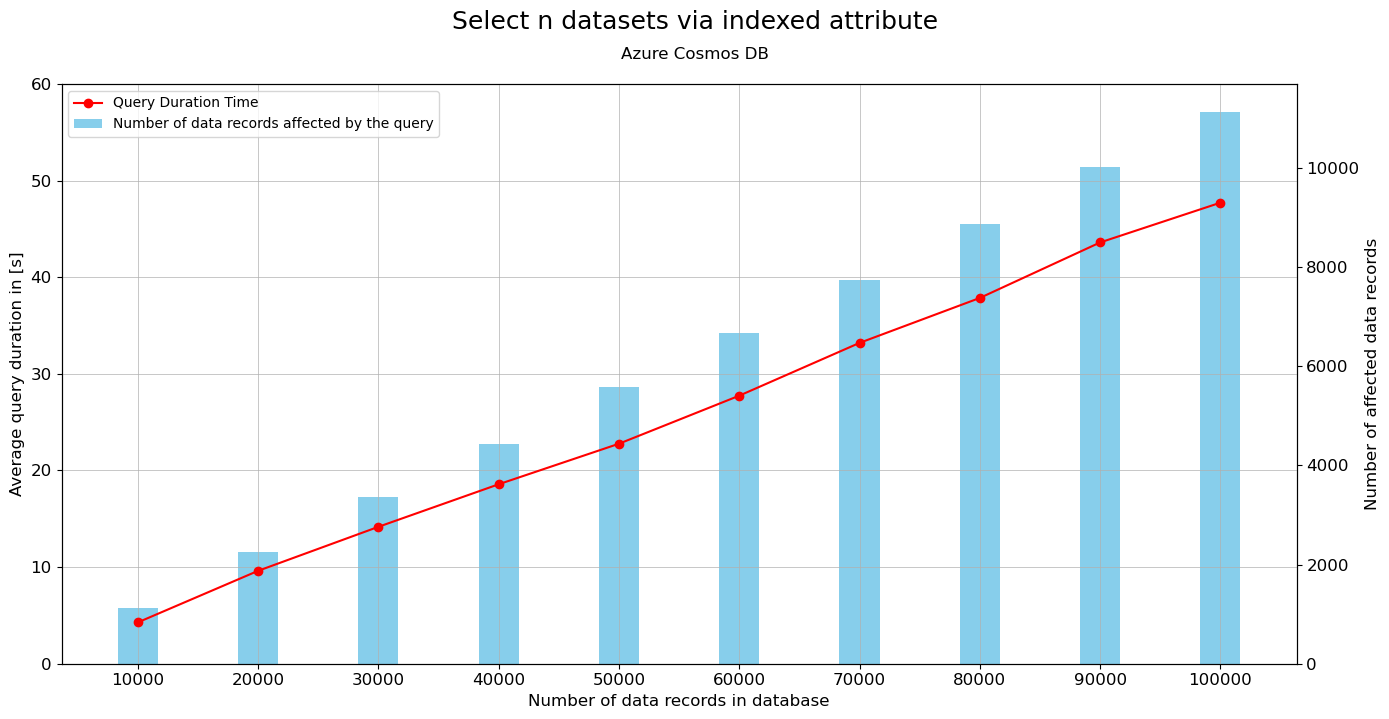

In [8]:
# Azure SQL Database
df_result_data = read_csv_data_and_store_in_dataframe("Experiment_Results_Azure_SQL_Database", "select_to_articlename.csv")

plot_database_result_data(
    df_result_data, 
    plot_title = "Select n datasets via indexed attribute",
    plot_subtitle = "Azure SQL Database",
    y_axis_range_1 = (0,10),
    y_axis_range_2 = None
)


# Azure Cosmos DB
df_result_data = read_csv_data_and_store_in_dataframe("Experiment_Results_Azure_Cosmos_DB", "select_to_articlename.csv")

plot_database_result_data(
    df_result_data, 
    plot_title = "Select n datasets via indexed attribute",
    plot_subtitle = "Azure Cosmos DB",
    y_axis_range_1 = (0,60),
    y_axis_range_2 = None
)

### Select n datasets to setpoint and machinename (Select without Index)

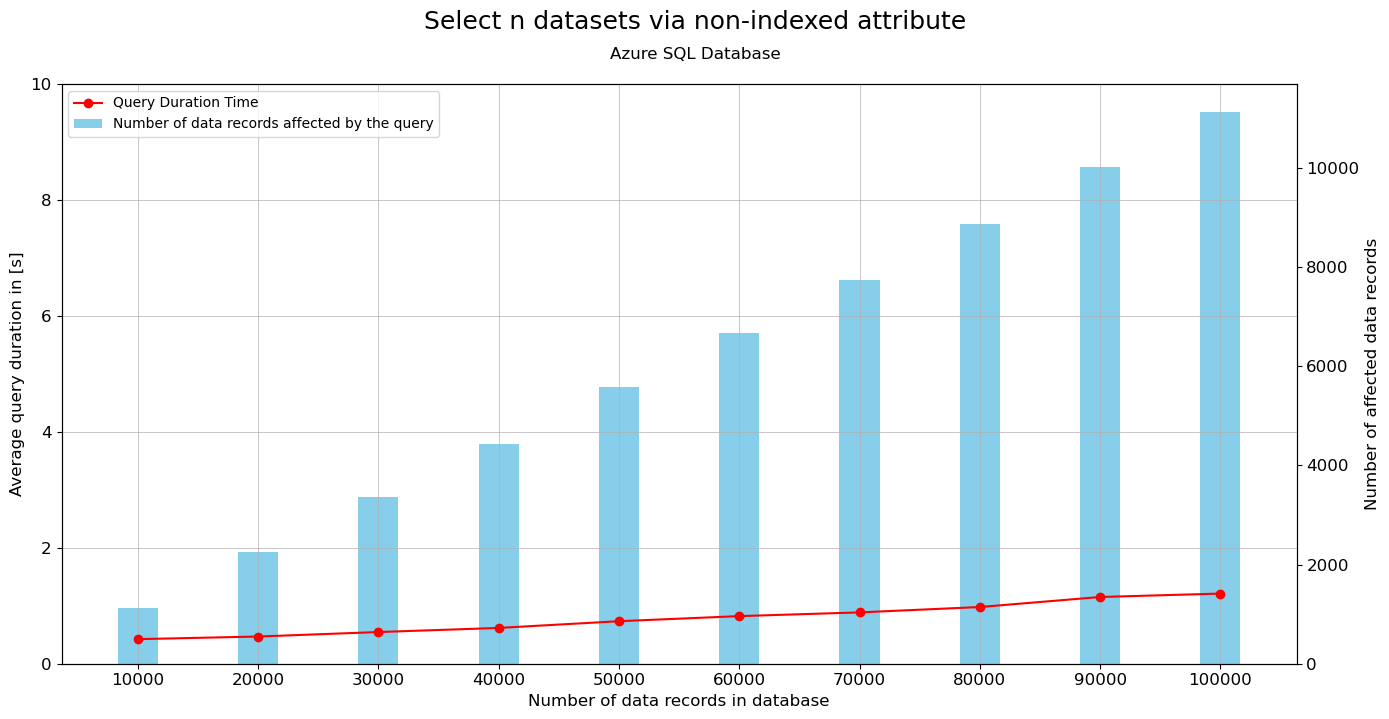

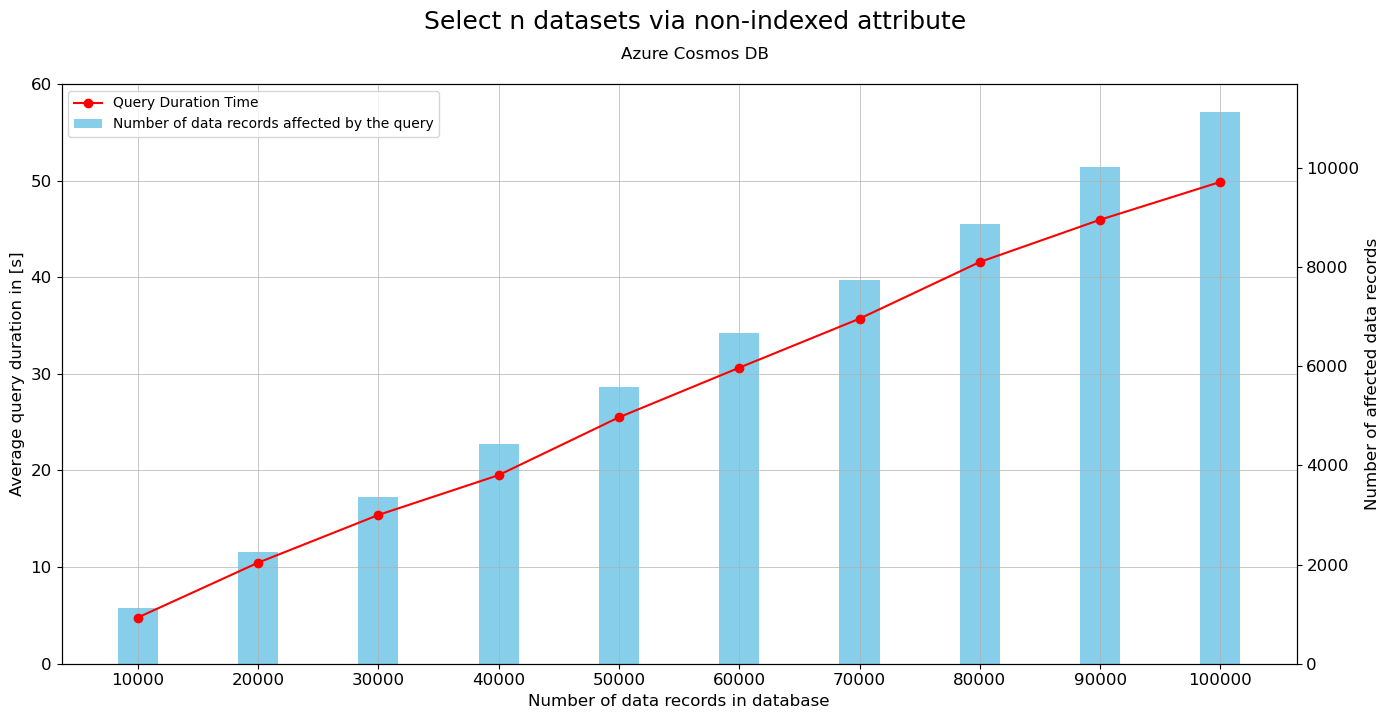

In [9]:
# Azure SQL Database
df_result_data = read_csv_data_and_store_in_dataframe("Experiment_Results_Azure_SQL_Database", "select_to_setpoint.csv")

plot_database_result_data(
    df_result_data, 
    plot_title = "Select n datasets via non-indexed attribute",
    plot_subtitle = "Azure SQL Database",
    y_axis_range_1 = (0,10),
    y_axis_range_2 = None
)


# Azure Cosmos DB
df_result_data = read_csv_data_and_store_in_dataframe("Experiment_Results_Azure_Cosmos_DB", "select_to_setpoint.csv")

plot_database_result_data(
    df_result_data, 
    plot_title = "Select n datasets via non-indexed attribute",
    plot_subtitle = "Azure Cosmos DB",
    y_axis_range_1 = (0,60),
    y_axis_range_2 = None
)

### Select Aggregate n datasets to articlename, machinename and Setpoint Name

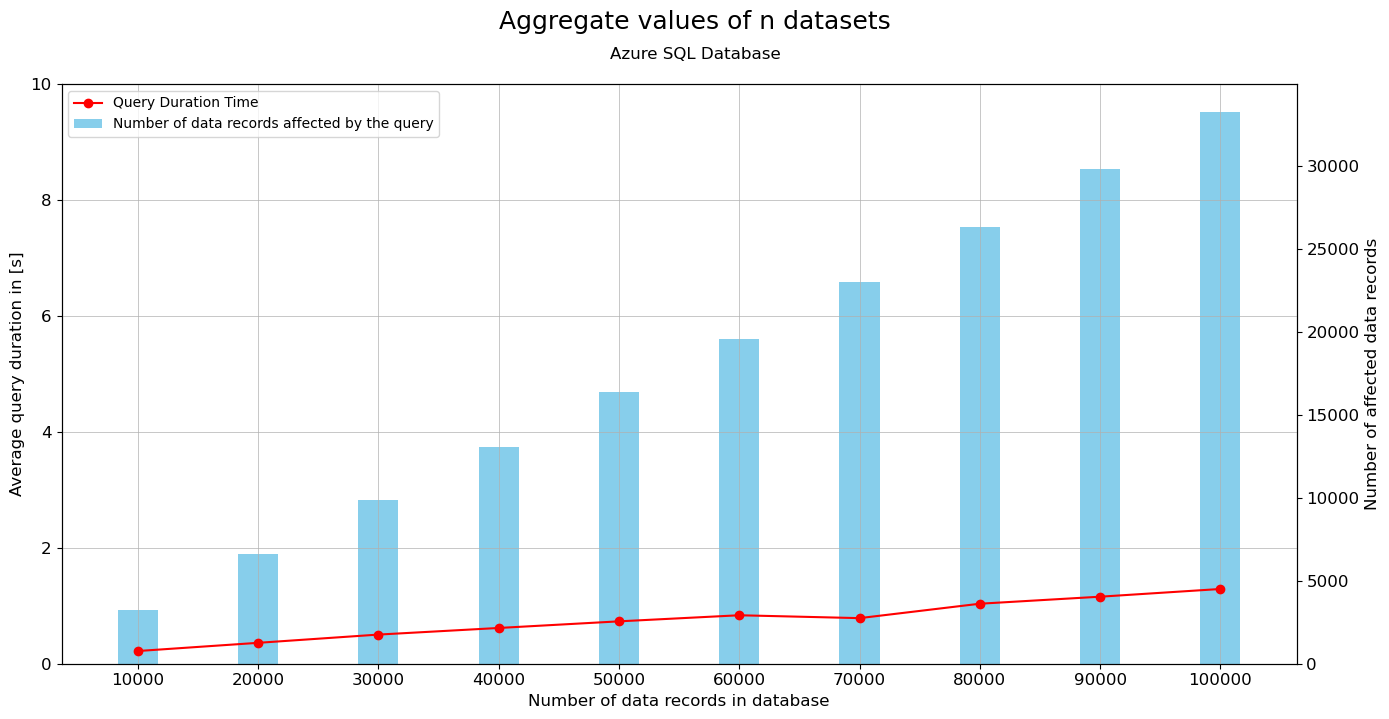

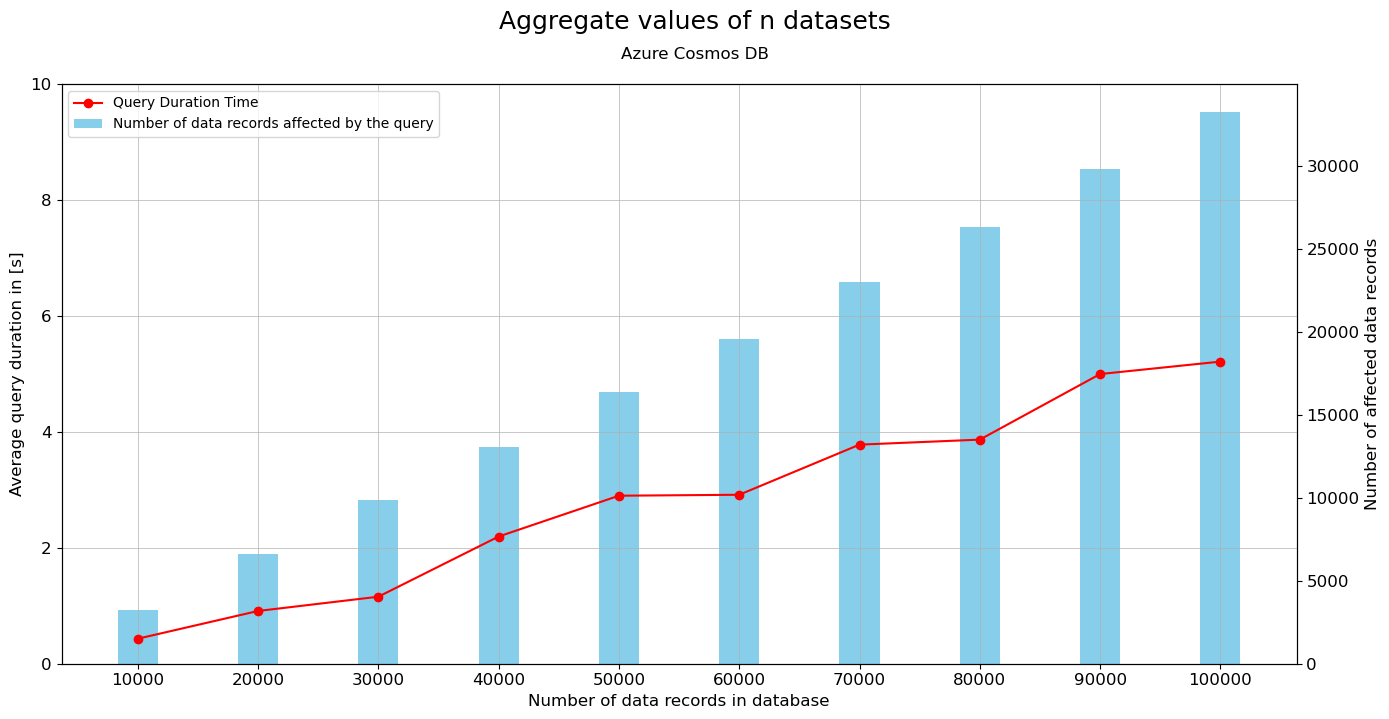

In [10]:
# Azure SQL Database
df_result_data = read_csv_data_and_store_in_dataframe("Experiment_Results_Azure_SQL_Database", "select_aggregate_to_articlename.csv")

plot_database_result_data(
    df_result_data, 
    plot_title = "Aggregate values of n datasets",
    plot_subtitle = "Azure SQL Database",
    y_axis_range_1 = (0,10),
    y_axis_range_2 = None
)


# Azure Cosmos DB
df_result_data = read_csv_data_and_store_in_dataframe("Experiment_Results_Azure_Cosmos_DB", "select_aggregate_to_articlename.csv")

plot_database_result_data(
    df_result_data, 
    plot_title = "Aggregate values of n datasets",
    plot_subtitle = "Azure Cosmos DB",
    y_axis_range_1 = (0,10),
    y_axis_range_2 = None
)

## UPDATE Data

### Update a specific dataset via serialnumber

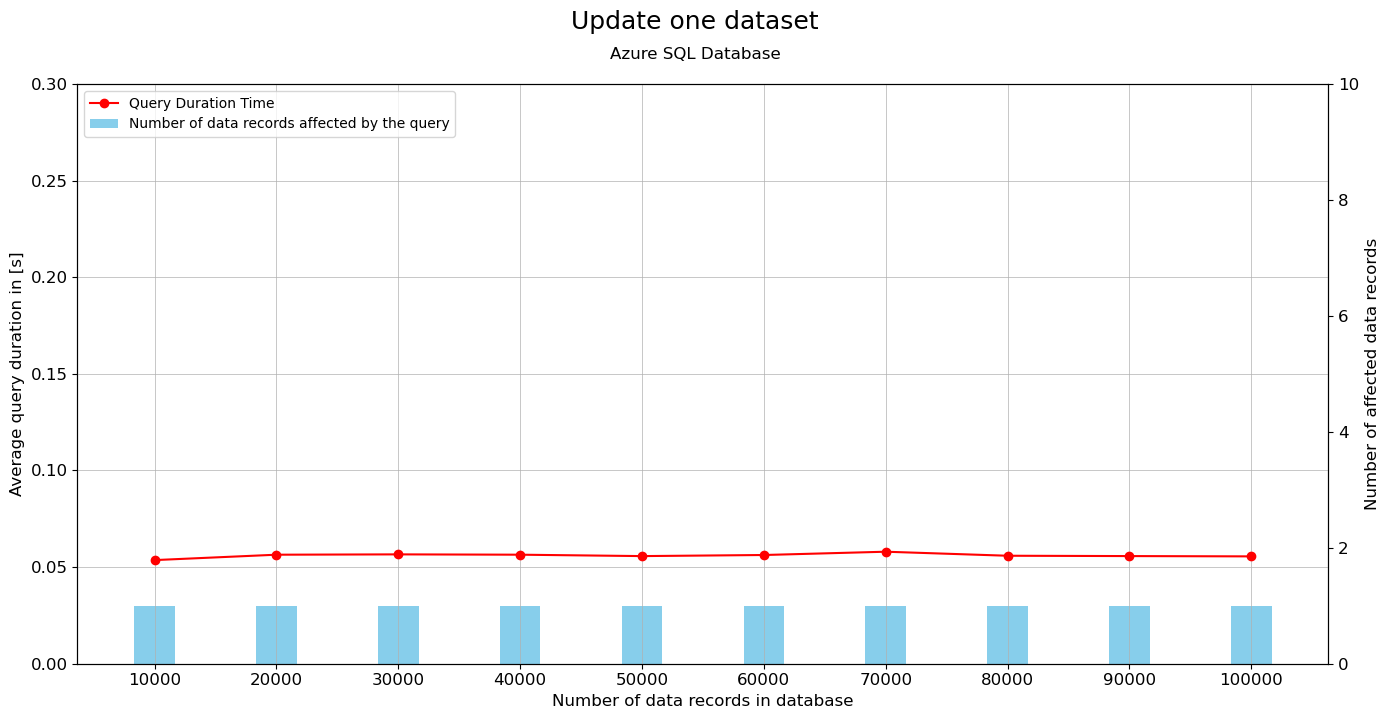

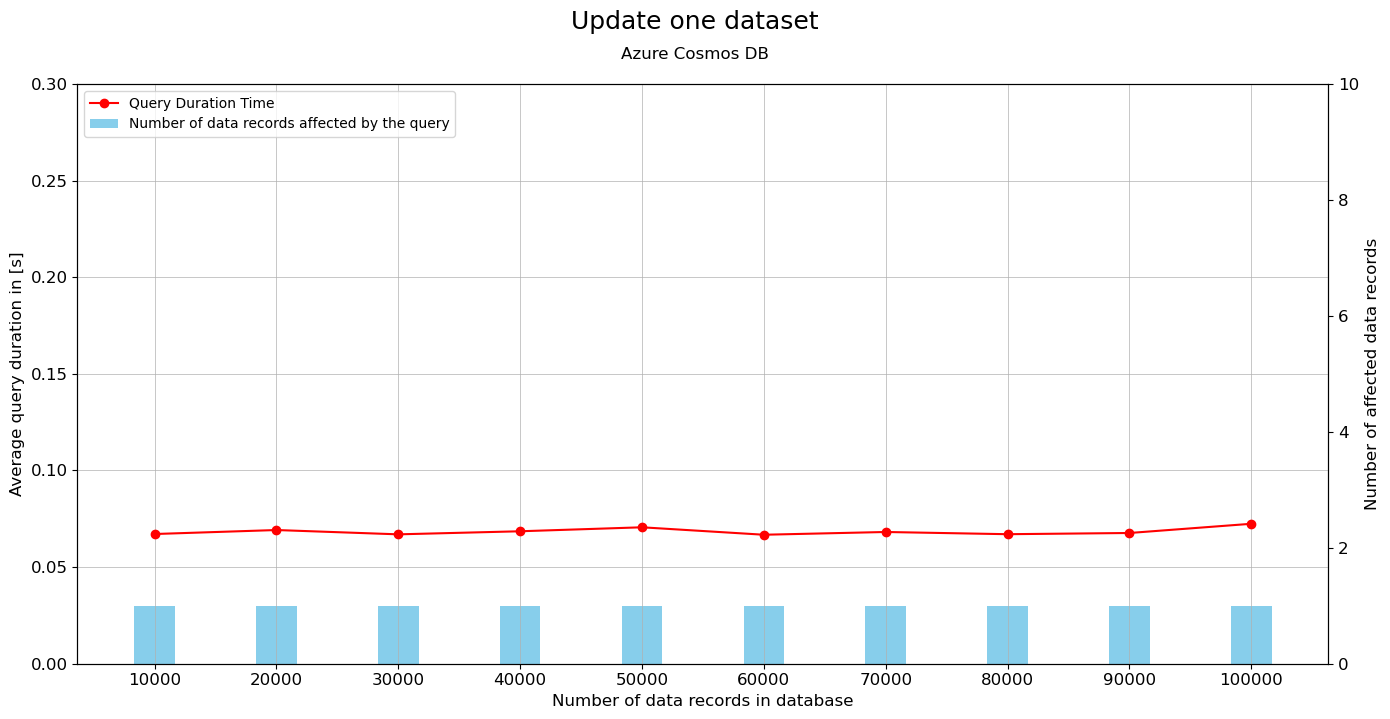

In [11]:
# Azure SQL Database
df_result_data = read_csv_data_and_store_in_dataframe("Experiment_Results_Azure_SQL_Database", "update_to_serialnumber.csv")

plot_database_result_data(
    df_result_data, 
    plot_title = "Update one dataset",
    plot_subtitle = "Azure SQL Database",
    y_axis_range_1 = (0,0.3),
    y_axis_range_2 = (0,10)
)


# Azure Cosmos DB
df_result_data = read_csv_data_and_store_in_dataframe("Experiment_Results_Azure_Cosmos_DB", "update_to_serialnumber.csv")

plot_database_result_data(
    df_result_data, 
    plot_title = "Update one dataset",
    plot_subtitle = "Azure Cosmos DB",
    y_axis_range_1 = (0,0.3),
    y_axis_range_2 = (0,10)
)

### Update n datasets via articlename (Via Index)

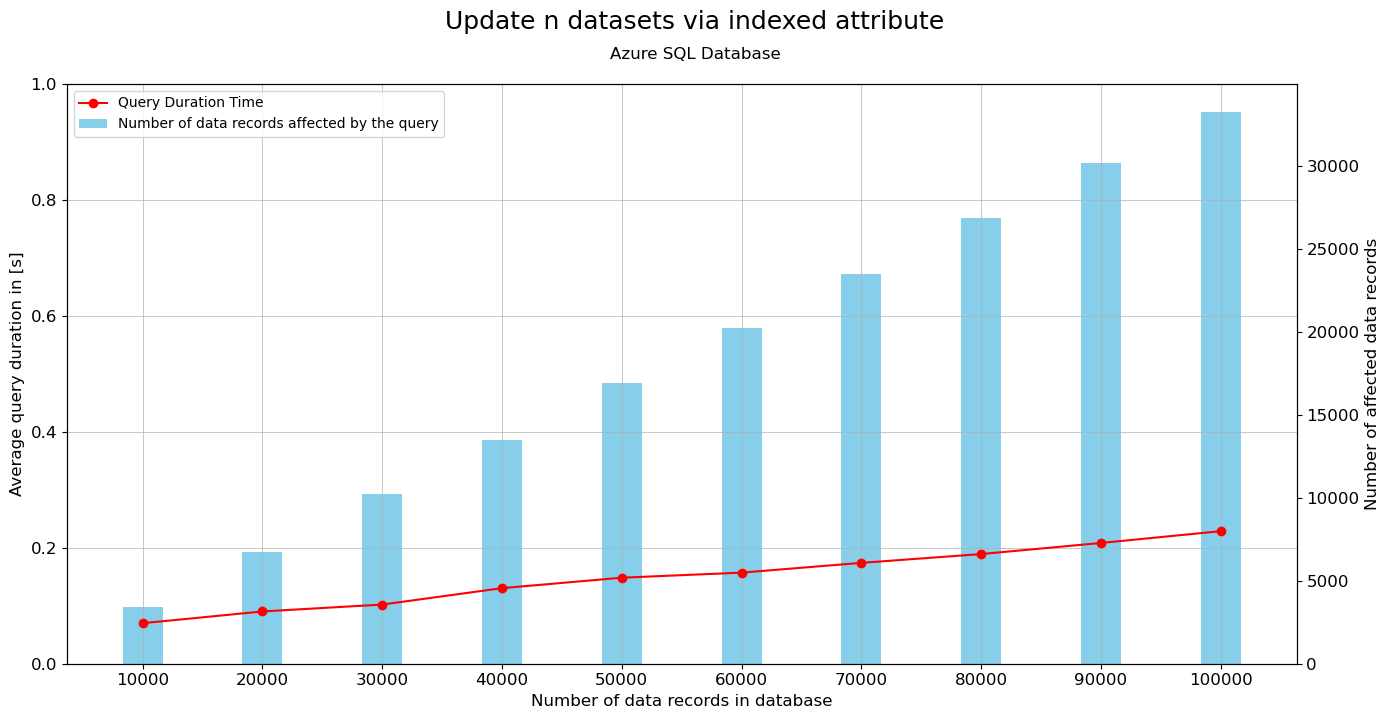

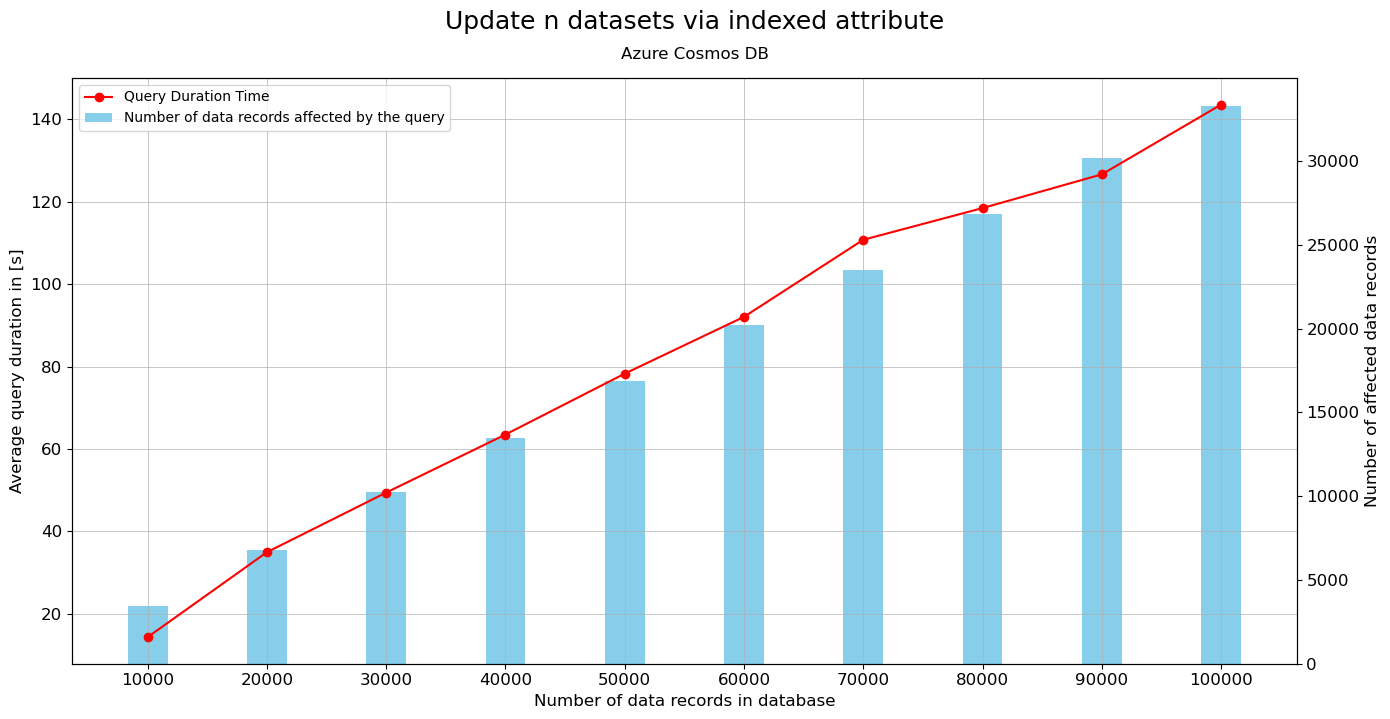

In [12]:
# Azure SQL Database
df_result_data = read_csv_data_and_store_in_dataframe("Experiment_Results_Azure_SQL_Database", "update_to_articlename.csv")

plot_database_result_data(
    df_result_data, 
    plot_title = "Update n datasets via indexed attribute",
    plot_subtitle = "Azure SQL Database",
    y_axis_range_1 = (0,1),
    y_axis_range_2 = None
)


# Azure Cosmos DB
df_result_data = read_csv_data_and_store_in_dataframe("Experiment_Results_Azure_Cosmos_DB", "update_to_articlename.csv")

plot_database_result_data(
    df_result_data, 
    plot_title = "Update n datasets via indexed attribute",
    plot_subtitle = "Azure Cosmos DB",
    y_axis_range_1 = None,
    y_axis_range_2 = None
)

### Update n datasets via machinename (Via No-Index)

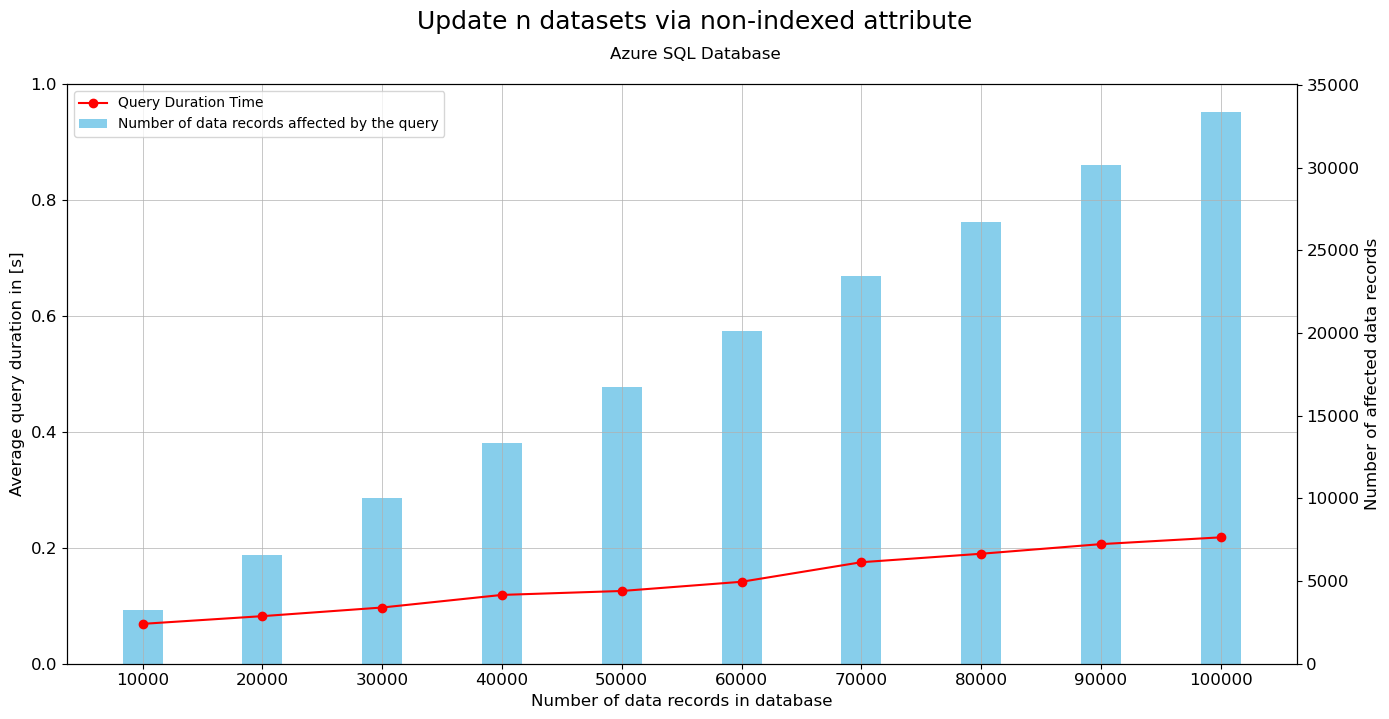

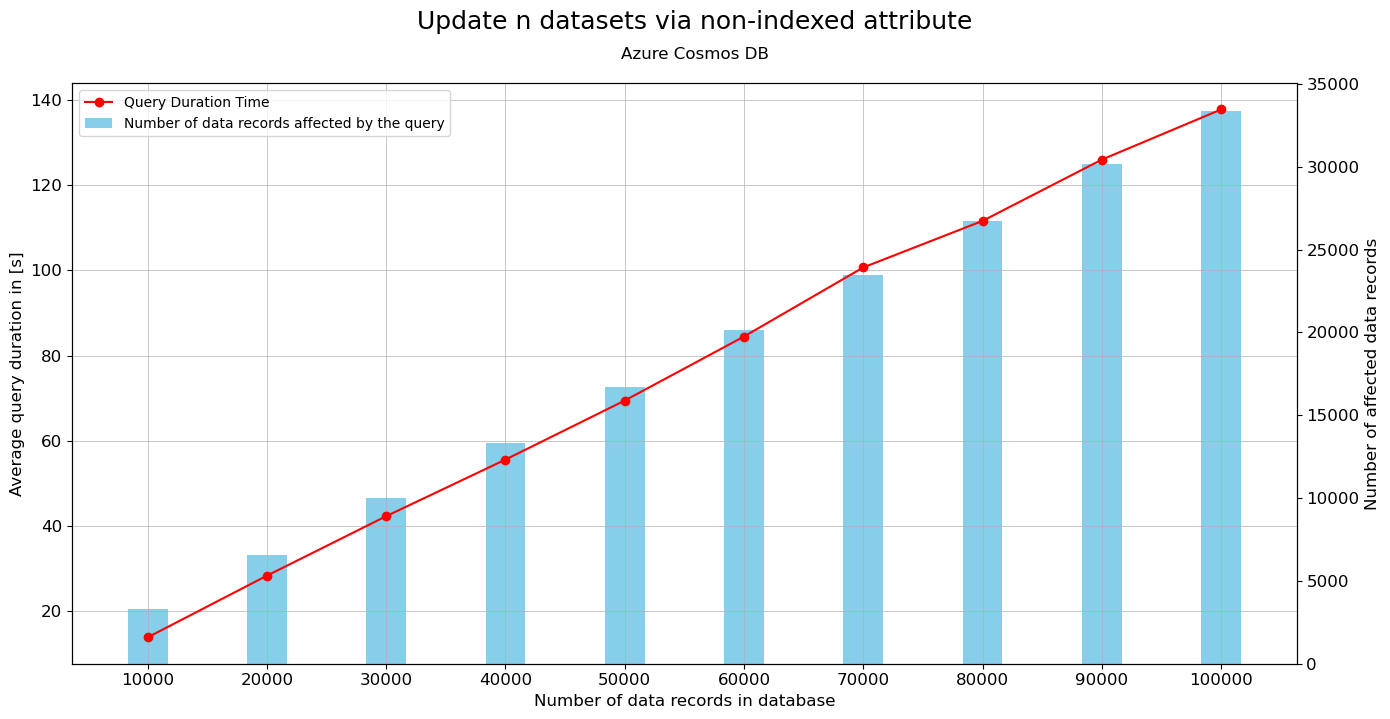

In [13]:
# Azure SQL Database
df_result_data = read_csv_data_and_store_in_dataframe("Experiment_Results_Azure_SQL_Database", "update_to_machinename.csv")

plot_database_result_data(
    df_result_data, 
    plot_title = "Update n datasets via non-indexed attribute",
    plot_subtitle = "Azure SQL Database",
    y_axis_range_1 = (0,1),
    y_axis_range_2 = None
)


# Azure Cosmos DB
df_result_data = read_csv_data_and_store_in_dataframe("Experiment_Results_Azure_Cosmos_DB", "update_to_machinename.csv")

plot_database_result_data(
    df_result_data, 
    plot_title = "Update n datasets via non-indexed attribute",
    plot_subtitle = "Azure Cosmos DB",
    y_axis_range_1 = None,
    y_axis_range_2 = None
)

## DELETE Data

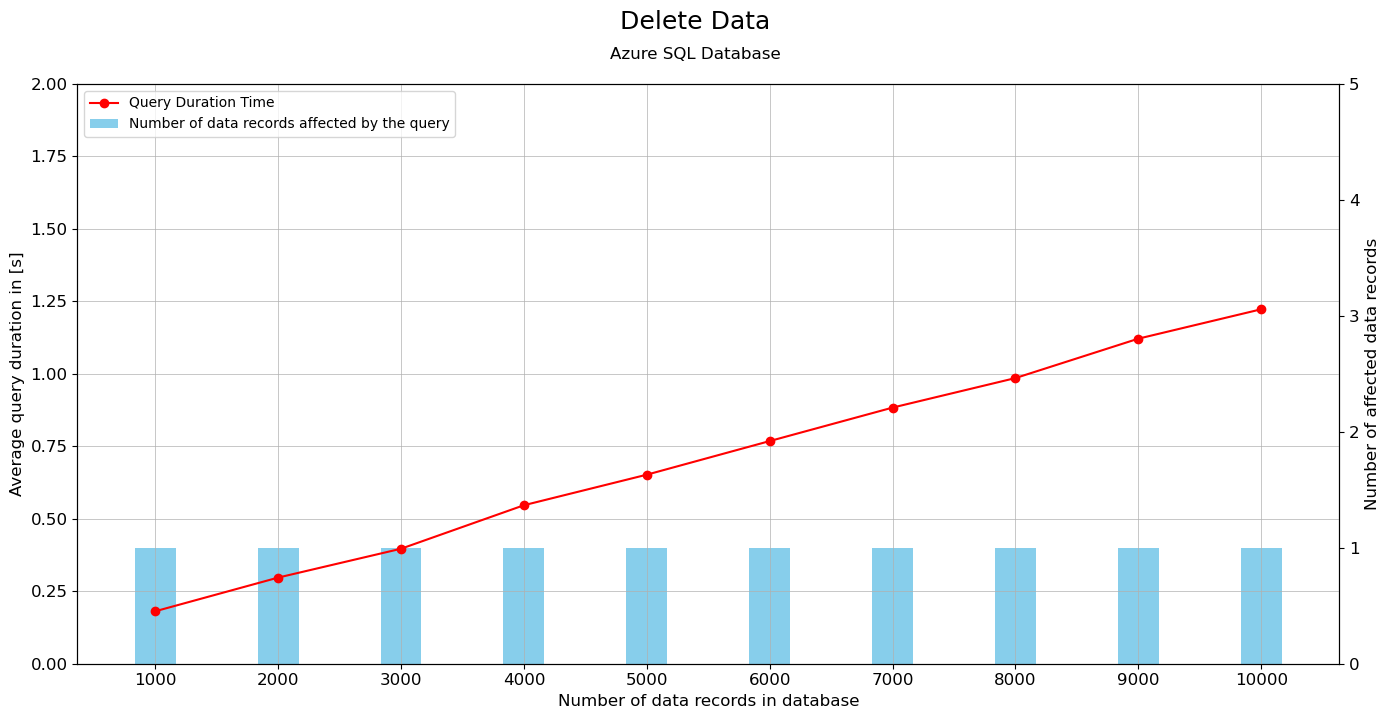

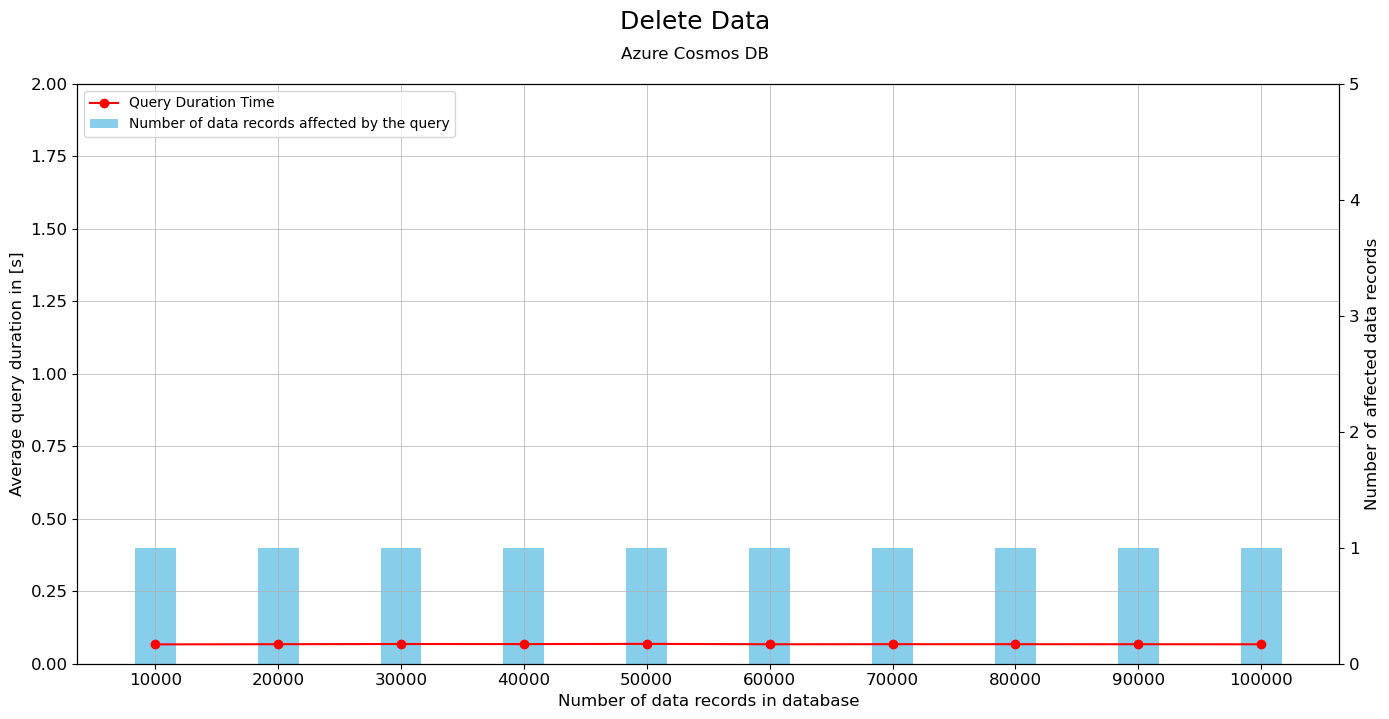

In [14]:
# Azure SQL Database
df_result_data = read_csv_data_and_store_in_dataframe("Experiment_Results_Azure_SQL_Database", "delete_data.csv")

plot_database_result_data(
    df_result_data, 
    plot_title = "Delete Data",
    plot_subtitle = "Azure SQL Database",
    y_axis_range_1 = (0,2),
    y_axis_range_2 = (0,5)
)


# Azure Cosmos DB
df_result_data = read_csv_data_and_store_in_dataframe("Experiment_Results_Azure_Cosmos_DB", "delete_data.csv")

plot_database_result_data(
    df_result_data, 
    plot_title = "Delete Data",
    plot_subtitle = "Azure Cosmos DB",
    y_axis_range_1 = (0,2),
    y_axis_range_2 = (0,5)
)